In [1]:
import requests
import json
import pandas as pd


# import style dims
url = 'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/style_dims_names.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims_names = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

# import fighter data
all_fighter_data = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true')


#import fihgt styles dims
fighters_styles_dims = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/raw/main/data/02_intermediate/fighters_styles_dims.csv')
#fighters_styles_dims = fighters_styles_dims.dropna()

Data loaded successfully:


In [2]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

fighters_styles_dims_copy = fighters_styles_dims.copy()
fighters_styles_dims_copy.loc[:, style_dims_names] = scaler.fit_transform(fighters_styles_dims_copy[style_dims_names])
fighters_styles_dims = fighters_styles_dims_copy



# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)

In [4]:
weight_class = list(fighters_styles_dims['weight_class'].drop_duplicates())
weight_class.remove('OpenWeight')
weight_class.remove('WomenBantamweight')
weight_class.remove('WomenFeatherweight')

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


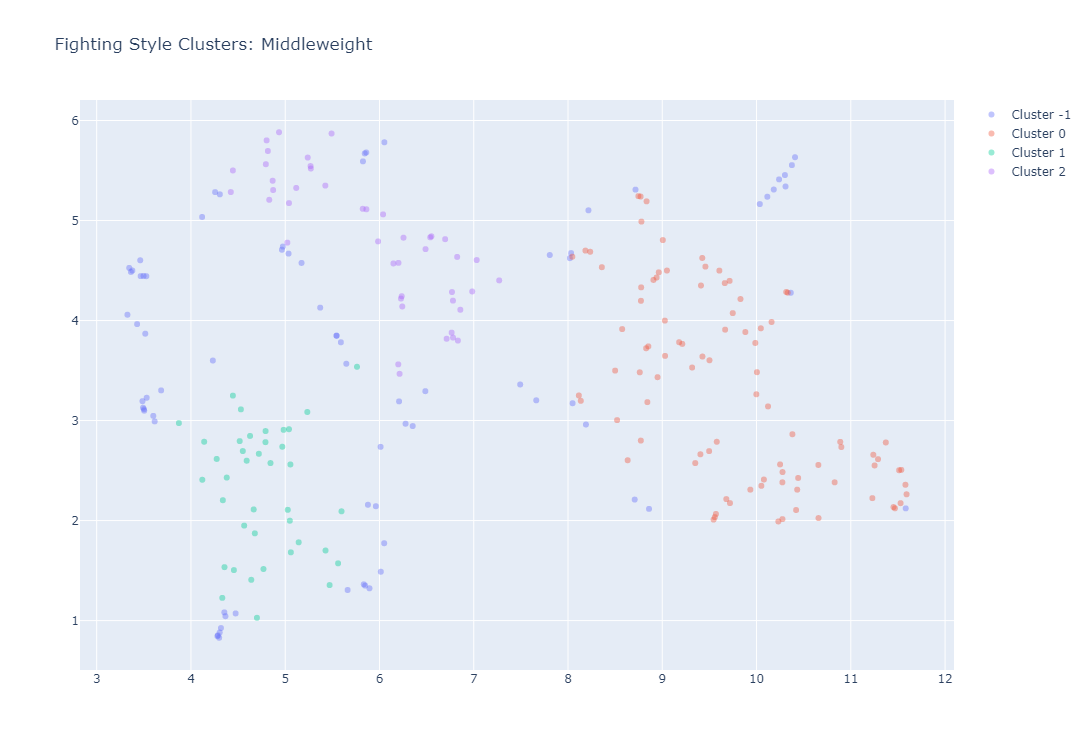

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



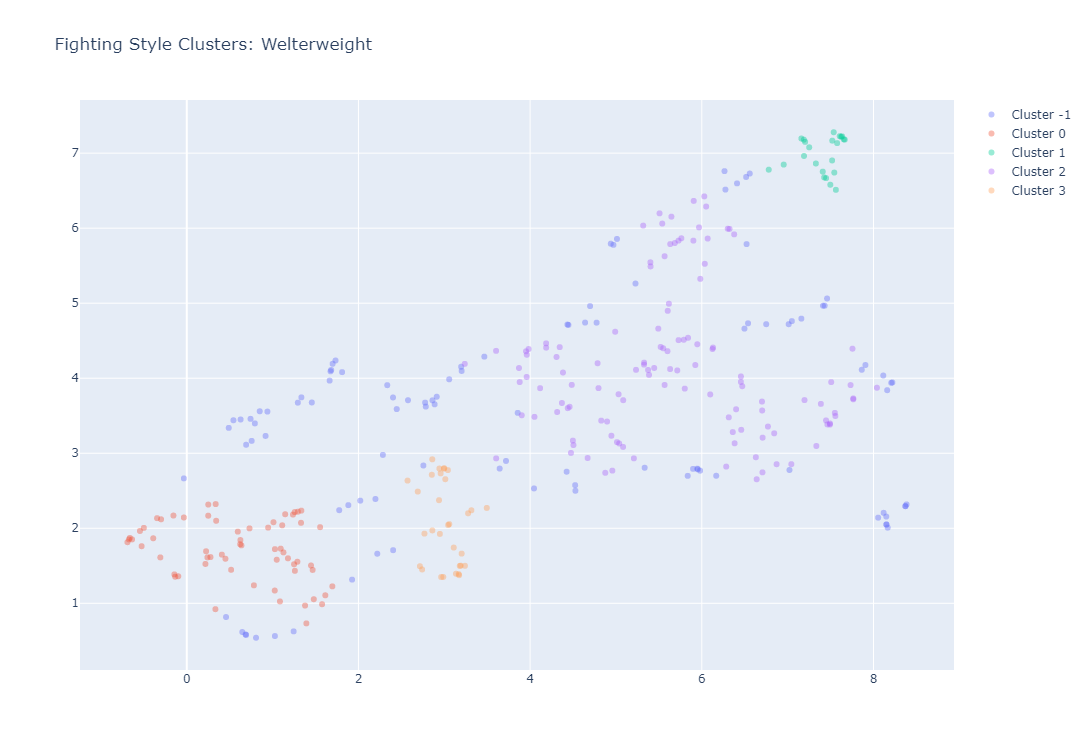

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



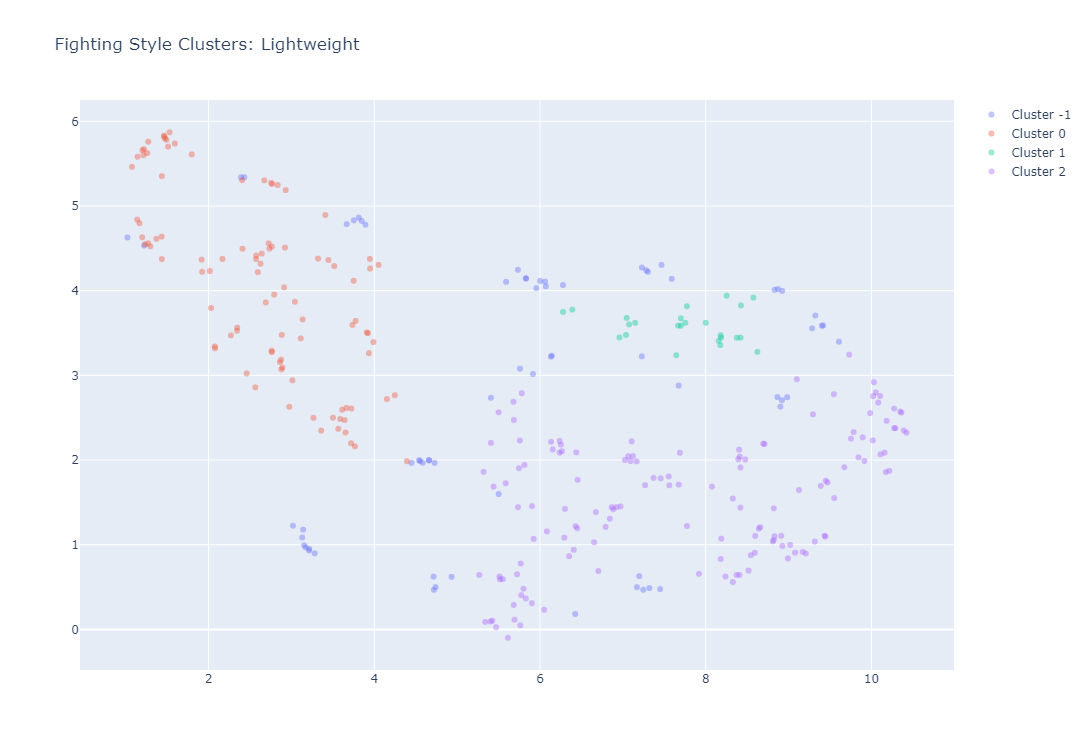

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



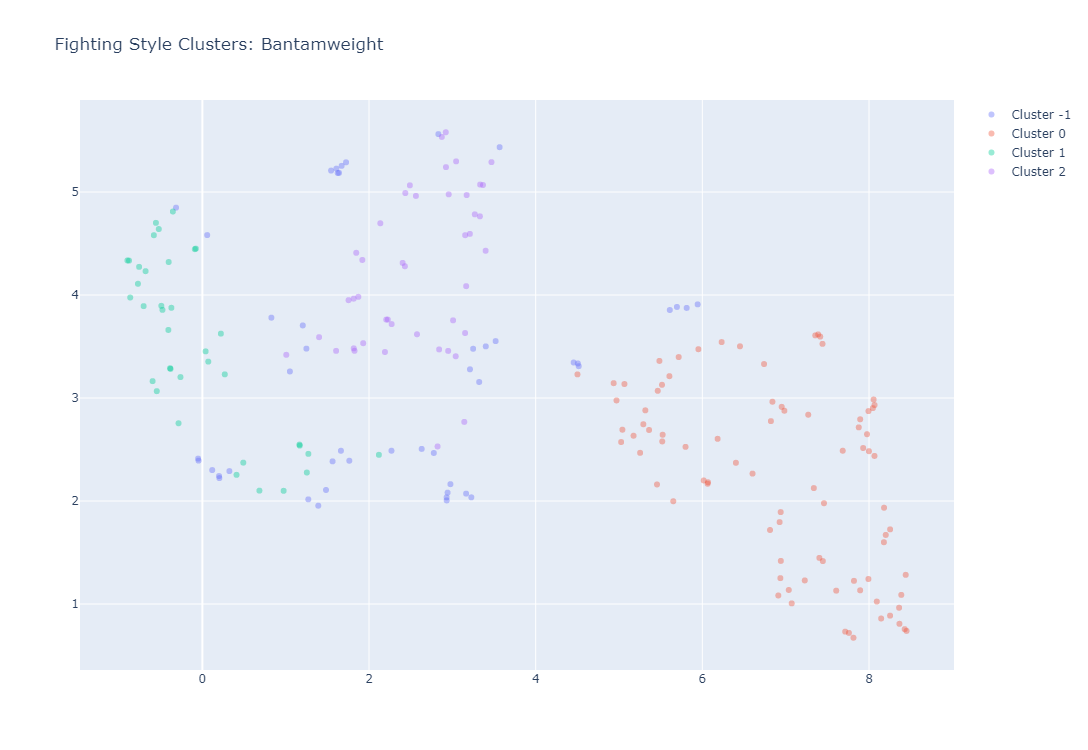

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



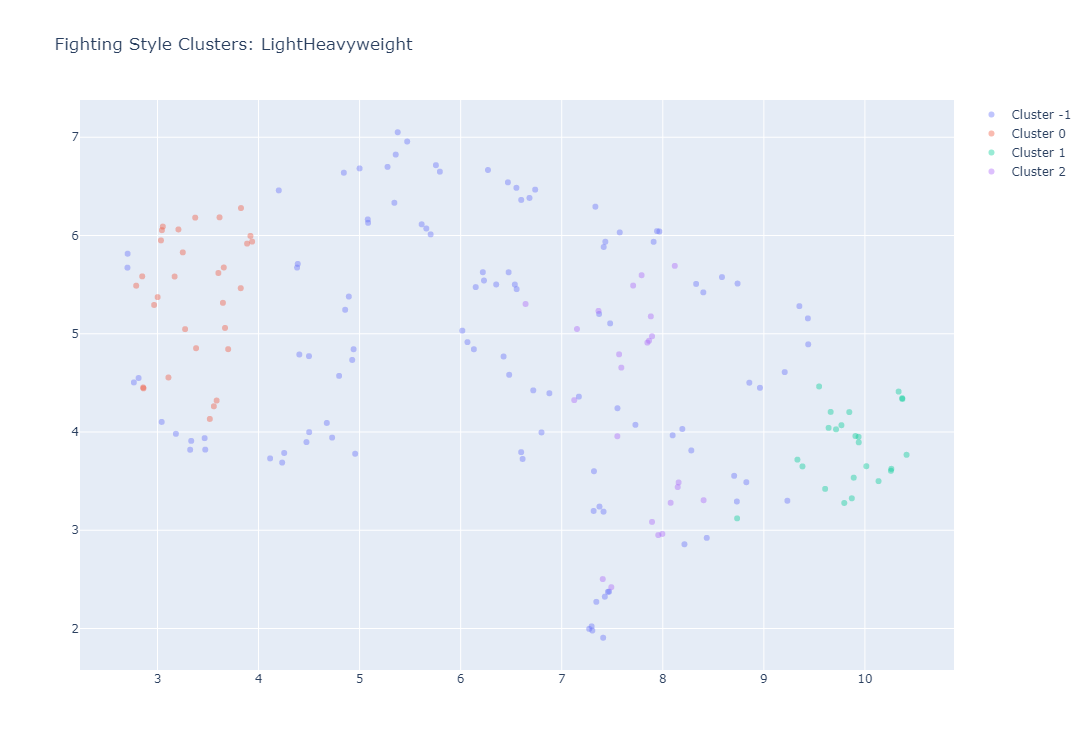

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



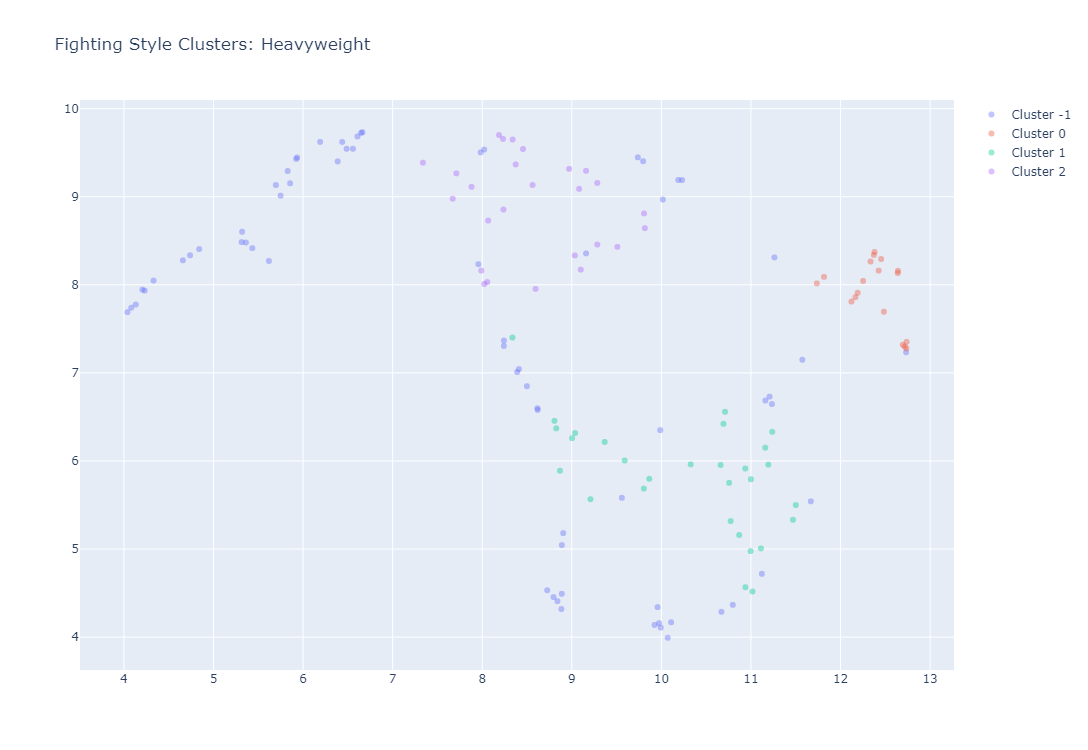

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



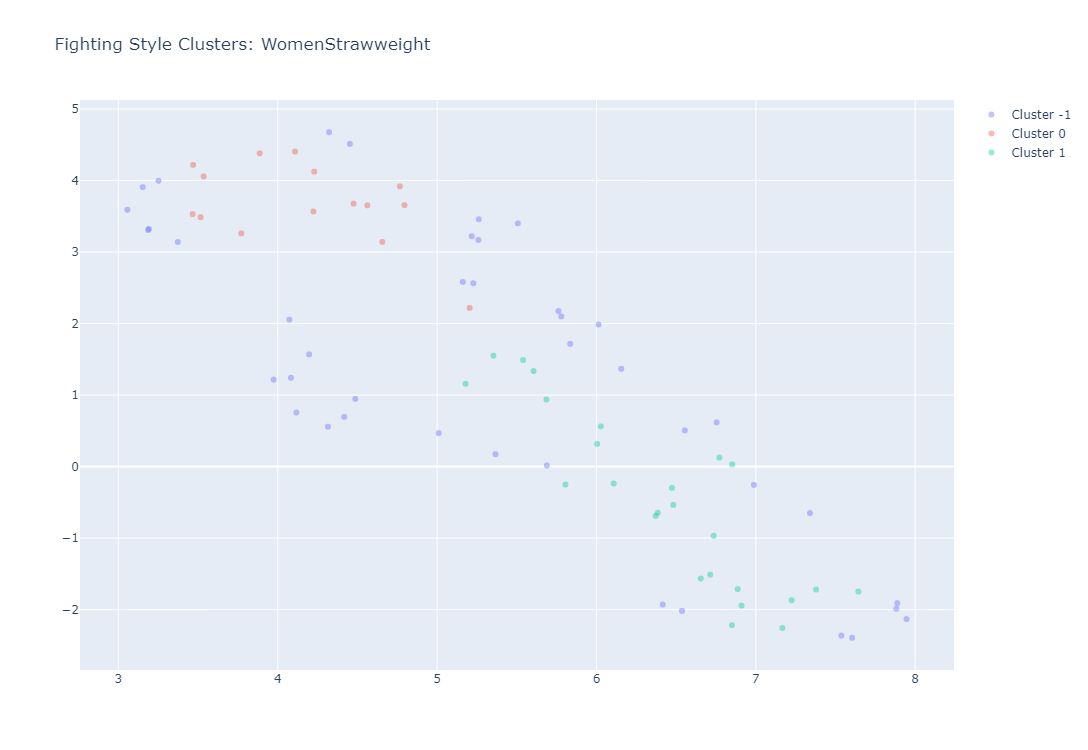

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



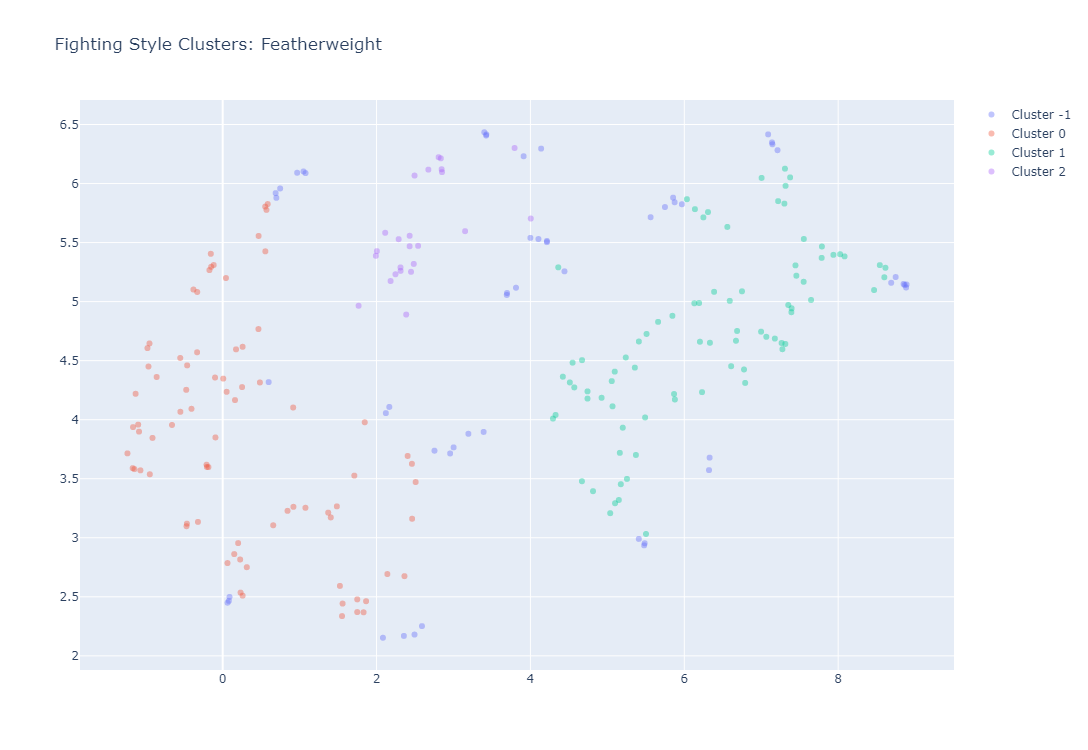

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



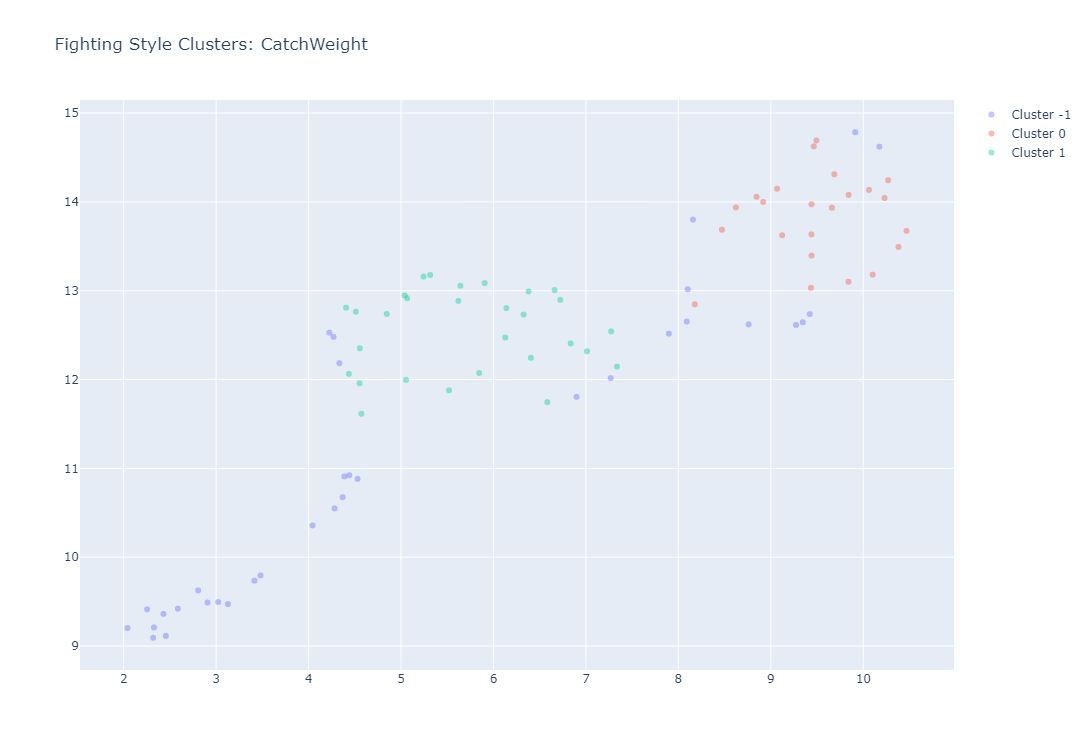

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



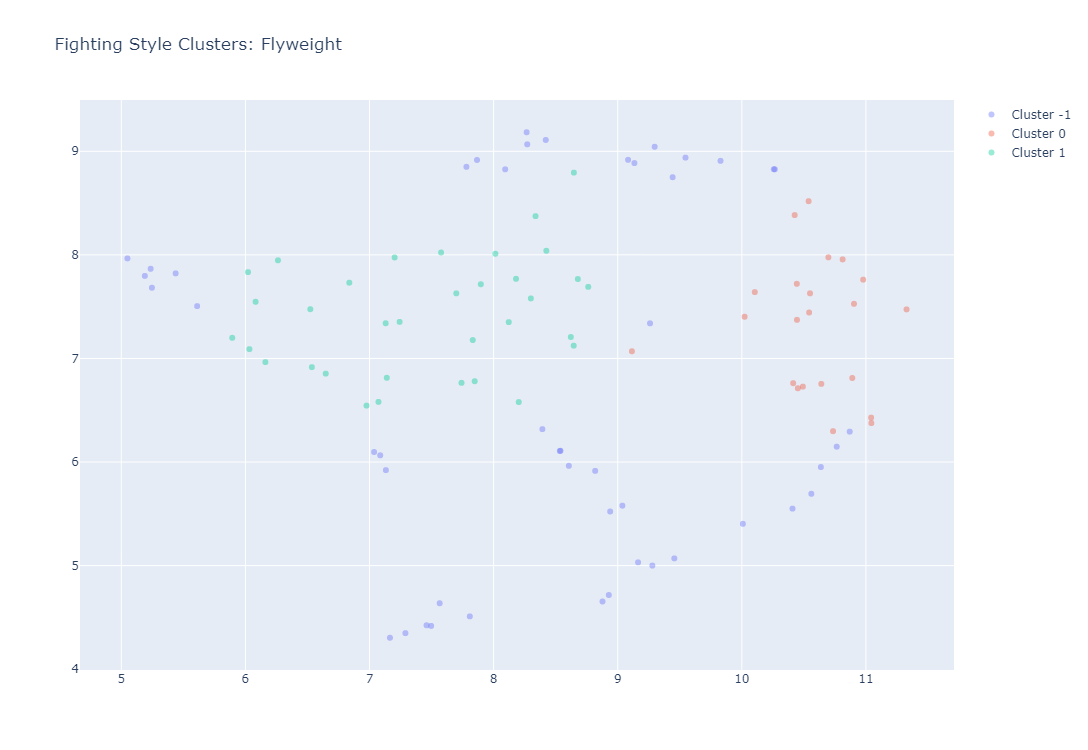

C:\Users\johna\anaconda3\envs\ufc-env\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



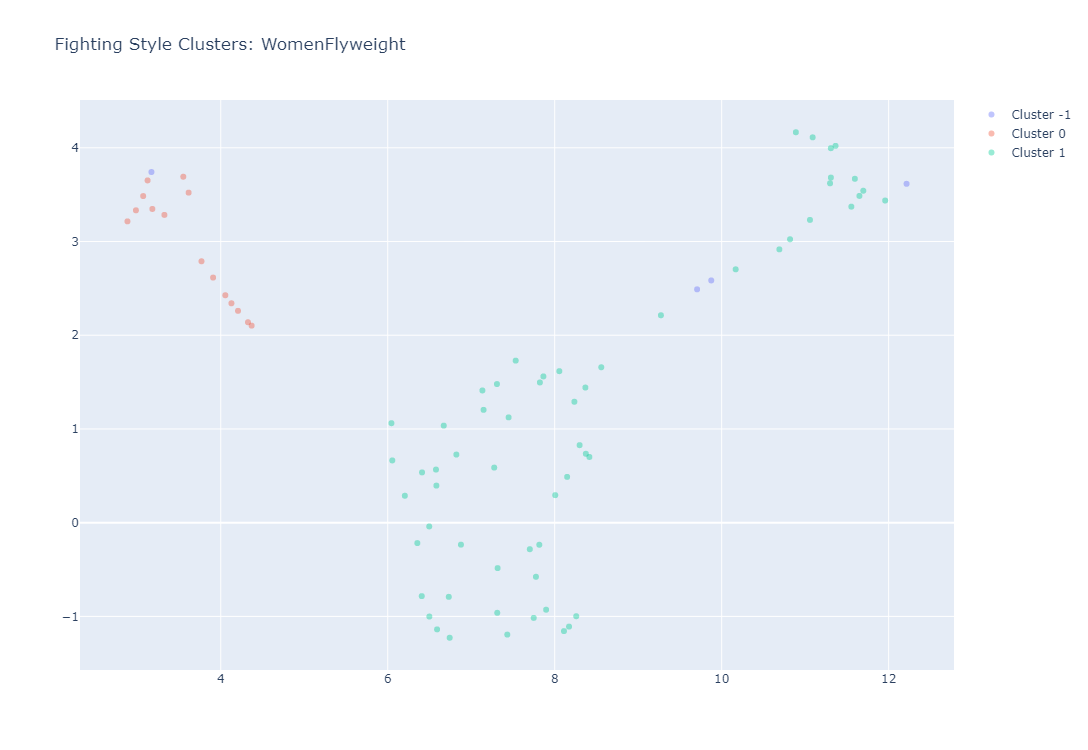

In [5]:
from scripts.cluster_gower_weight import ClusterAnalysis

for weight in weight_class:
    ca = ClusterAnalysis(fighters_styles_dims.loc[fighters_styles_dims['weight_class'] == weight], n_neighbors=5, min_cluster_size=15, min_dist=0.02, cluster_dims=style_dims_names, export_data=True, weight_factor=1000)
    ca.run()


In [6]:
import os
import pandas as pd
import requests
from io import StringIO

# Set your GitHub username, repository name, and path to the directory
username = 'john-adeojo'
repository = 'ufc_styles'
directory_path = 'data/02_intermediate'

# Generate the GitHub API URL for the repository contents
api_url = f'https://api.github.com/repos/{username}/{repository}/contents/{directory_path}'

# Fetch the list of files in the GitHub repository
response = requests.get(api_url)
files = response.json()

all_fighter_clusters = pd.DataFrame()

for file in files:
    file_name = file['name']
    if file_name.startswith('fighter_cluster') and file_name.endswith('.csv'):
        file_url = file['download_url']
        response = requests.get(file_url)
        csv_data = StringIO(response.text)
        
        df = pd.read_csv(csv_data)
        all_fighter_clusters = pd.concat([all_fighter_clusters, df], ignore_index=True)

# Display the DataFrame
all_fighter_clusters


Fighter_dims      weight_class    avg_KD  avg_opp_KD  avg_SUB_ATT  \
0      Aaron Phillips      Bantamweight -0.321141   -0.338980    -0.032120   
1        Adrian Yanez      Bantamweight  1.256562   -0.338980    -0.557353   
2      Aiemann Zahabi      Bantamweight  0.048013   -0.176458    -0.557353   
3        Alatengheili      Bantamweight -0.321141   -0.338980    -0.557353   
4      Albert Morales      Bantamweight -0.321141   -0.125411    -0.557353   
...               ...               ...       ...         ...          ...   
2042  Virna Jandiroba  WomenStrawweight -0.270850   -0.338980     0.554066   
2043  Viviane Pereira  WomenStrawweight -0.321141   -0.338980    -0.440635   
2044      Yan Xiaonan  WomenStrawweight -0.321141   -0.338980    -0.557353   
2045  Yazmin Jauregui  WomenStrawweight -0.321141   -0.338980    -0.557353   
2046      Zhang Weili  WomenStrawweight -0.172406   -0.240143    -0.287606   

      avg_opp_SUB_ATT   avg_REV  avg_opp_REV  avg_SIG_STR_att  \
0            0.023398  1.098709     1.202792        -1.382189   
1           -0.495115 -0.479170    -0.478442         1.858325   
2           -0.495115  0.065726    -0.478442        -0.222842   
3           -0.495115 -0.479170    -0.478442         0.973289   
4           -0.313331 -0.479170    -0.478442         1.204915   
...               ...       ...          ...              ...   
2042        -0.426788  1.356037     0.499267        -0.720972   
2043        -0.495115 -0.479170    -0.478442        -0.108999   
2044        -0.324341 -0.479170    -0.478442         1.623690   
2045        -0.495115 -0.479170    -0.478442         1.841582   
2046        -0.275548 -0.091080    -0.266245         1.317195   

      avg_SIG_STR_landed  ...  avg_opp_CTRL_time(seconds)  Stance_Open Stance  \
0              -1.020740  ...                    2.971396           -0.030715   
1               1.205117  ...                   -0.666640           -0.030715   
2              -0.355912  ...                   -0.782333           -0.030715   
3              -0.255224  ...                   -1.326567           -0.030715   
4               0.286525  ...                   -0.205421           -0.030715   
...                  ...  ...                         ...                 ...   
2042           -0.640518  ...                    0.078068           -0.030715   
2043           -0.563094  ...                   -0.078363           -0.030715   
2044            1.146358  ...                    0.249562           -0.030715   
2045            1.076109  ...                   -1.101924           -0.030715   
2046            1.146373  ...                   -0.856108           -0.030715   

      Stance_Orthodox  Stance_Sideways  Stance_Southpaw  Stance_Switch  \
0           -1.726626              0.0         2.062153      -0.246982   
1            0.579164              0.0        -0.484930      -0.246982   
2            0.579164              0.0        -0.484930      -0.246982   
3            0.579164              0.0        -0.484930      -0.246982   
4            0.579164              0.0        -0.484930      -0.246982   
...               ...              ...              ...            ...   
2042         0.579164              0.0        -0.484930      -0.246982   
2043         0.579164              0.0        -0.484930      -0.246982   
2044         0.579164              0.0        -0.484930      -0.246982   
2045         0.579164              0.0        -0.484930      -0.246982   
2046        -1.726626              0.0        -0.484930       4.048882   

              x          y  cluster     specific_cluster  
0      6.089760   5.863171        0       0_Bantamweight  
1     11.742890  11.548580        1       1_Bantamweight  
2     10.772142   9.732456        1       1_Bantamweight  
3     10.094245  11.759737        1       1_Bantamweight  
4     11.032945  11.257565        1       1_Bantamweight  
...         ...        ...      ...                  ...  
2042   6.457643 

In [7]:
all_fighter_clusters.to_csv(r"C:\Users\johna\anaconda3\envs\ufc-env\ufc_styles\data\02_intermediate\all_fighter_clusters.csv", index=False)